In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [4]:
pd.set_option('display.max_rows', None) #if activated avoid runing a cell to show a whole df, use head()

In [5]:
url = "clust_data_nextbike_2020-07.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [6]:
negative_values = df[df['ride_time_minutes'] < 0].index.to_list() #check for negative values
negative_values

[]

In [7]:
#df.drop(negative_values, inplace=True) #activate if needed

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time_minutes,distance,uid_begin,uid_end,standing_before_ride,address,name
0,50.921618,6.933237,50.913049,6.922490,2020-07-01 09:31:02.322428,2020-07-01 09:49:01.995455,18.0,1215.0,31804315,31819860,571.0,NaN,BIKE 22933
1,50.913049,6.922490,50.910794,6.941967,2020-07-01 10:35:02.336121,2020-07-01 10:44:02.333799,9.0,1389.0,31819860,31821838,46.0,NaN,BIKE 22933
2,50.910794,6.941967,50.931395,6.918226,2020-07-01 11:32:02.897704,2020-07-01 11:55:01.902627,23.0,2832.0,31821838,31824497,48.0,NaN,BIKE 22933
3,50.931395,6.918226,50.929816,6.913806,2020-07-01 12:03:01.601807,2020-07-01 12:24:02.273590,21.0,356.0,31824497,31825694,8.0,NaN,BIKE 22933
4,50.929816,6.913806,50.929823,6.913615,2020-07-01 17:59:02.213975,2020-07-01 18:05:02.088433,6.0,13.0,31825694,31843292,335.0,NaN,BIKE 22933


In [107]:
for index,value in df.iterrows():
    if (df['ride_time_minutes'][index] ==1.0) or (df['ride_time_minutes'][index] ==2.0):
        df.drop(index, inplace=True)

In [109]:
for index,value in df.iterrows():
    if df['ride_time_minutes'][index] >200:
        df.drop(index, inplace=True)

In [110]:
df['ride_time_minutes'].max()

200.0

In [111]:
df.reset_index(inplace=True)
df = df.drop('index', axis=1)

In [112]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time_minutes,distance,uid_begin,uid_end,standing_before_ride,address,name
0,50.921618,6.933237,50.913049,6.922490,2020-07-01 09:31:02.322428,2020-07-01 09:49:01.995455,18.0,1215.0,31804315,31819860,571.0,NaN,BIKE 22933
1,50.913049,6.922490,50.910794,6.941967,2020-07-01 10:35:02.336121,2020-07-01 10:44:02.333799,9.0,1389.0,31819860,31821838,46.0,NaN,BIKE 22933
2,50.910794,6.941967,50.931395,6.918226,2020-07-01 11:32:02.897704,2020-07-01 11:55:01.902627,23.0,2832.0,31821838,31824497,48.0,NaN,BIKE 22933
3,50.931395,6.918226,50.929816,6.913806,2020-07-01 12:03:01.601807,2020-07-01 12:24:02.273590,21.0,356.0,31824497,31825694,8.0,NaN,BIKE 22933
4,50.929816,6.913806,50.929823,6.913615,2020-07-01 17:59:02.213975,2020-07-01 18:05:02.088433,6.0,13.0,31825694,31843292,335.0,NaN,BIKE 22933


<AxesSubplot:>

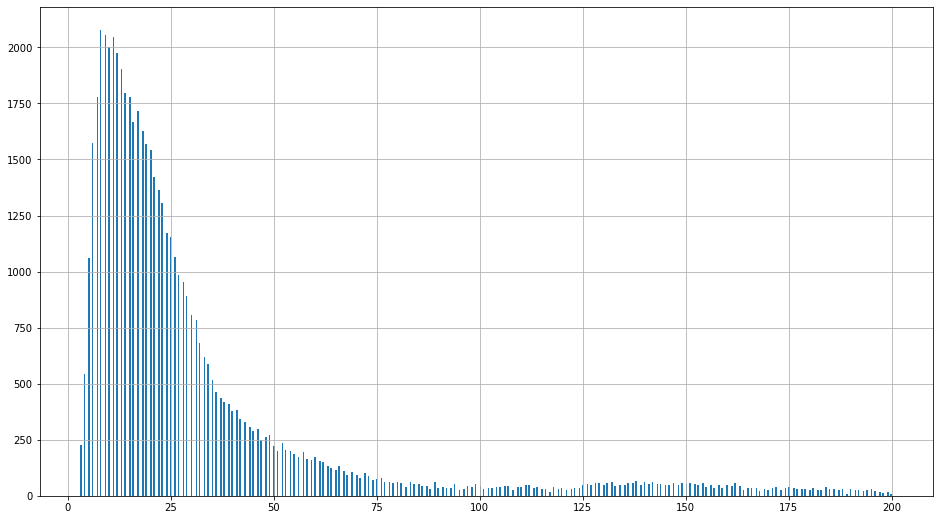

In [113]:
df['ride_time_minutes'].hist(bins=500)

In [114]:
#from sklearn import datasets
#data_set = datasets.load_breast_cancer()
#y=data_set.data[:,0]

In [115]:
#y = np.array(sr[2.0])
y = df['ride_time_minutes'].to_numpy()
x = np.arange(len(y))
size = len(y)

In [116]:
y

array([18.,  9., 23., ..., 23.,  5., 16.])

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
sc=StandardScaler() 
yy = y.reshape (-1,1)
sc.fit(yy)
y_std =sc.transform(yy)
y_std = y_std.flatten()
y_std
del yy

In [119]:
# Set list of distributions to test
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")

In [120]:
# Set up list of candidate distributions to use
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

In [121]:
# Set up empty lists to stroe results
chi_square = []
p_values = []

In [122]:
# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

In [123]:
# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    p = np.around(p, 5)
    p_values.append(p)    
    
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square.append(ss)

In [124]:
# Collate results and sort by goodness of fit (best at top)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results.sort_values(['chi_square'], inplace=True)
    
# Report results

print ('\nDistributions sorted by goodness of fit:')
print ('----------------------------------------')
print (results)


Distributions sorted by goodness of fit:
----------------------------------------
  Distribution    chi_square  p_value
3      lognorm  5.726391e+03      0.0
5     pearson3  3.961357e+04      0.0
1        expon  4.743576e+04      0.0
0         beta  6.012923e+04      0.0
8  weibull_min  6.739033e+04      0.0
2        gamma  1.063585e+05      0.0
4         norm  4.069985e+05      0.0
6       triang  4.424735e+05      0.0
7      uniform  7.301682e+05      0.0
9  weibull_max  1.202768e+06      0.0


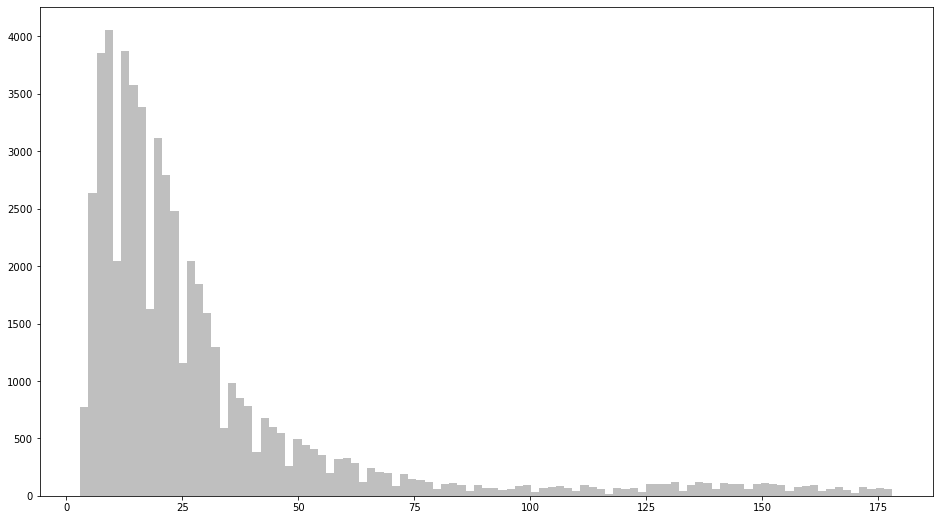

In [125]:
# Divide the observed data into 100 bins for plotting (this can be changed)
number_of_bins = 100
bin_cutoffs = np.linspace(np.percentile(y,0), np.percentile(y,99),number_of_bins)

# Create the plot
h = plt.hist(y, bins = bin_cutoffs, color='0.75')

# Get the top three distributions from the previous phase
number_distributions_to_plot = 3
dist_names = results['Distribution'].iloc[0:number_distributions_to_plot]

# Create an empty list to stroe fitted distribution parameters
parameters = []

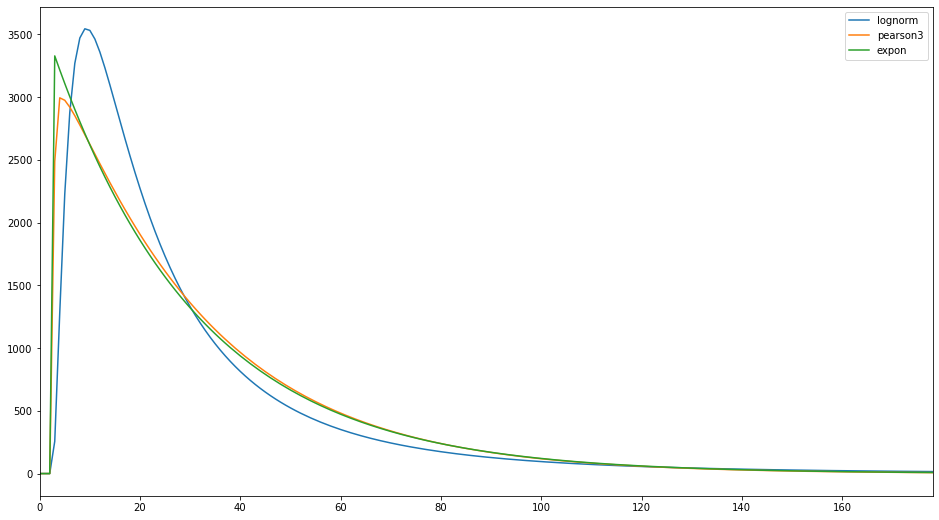

In [126]:
# Loop through the distributions ot get line fit and paraemters

for dist_name in dist_names:
    # Set up distribution and store distribution paraemters
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    parameters.append(param)
    
    # Get line for each distribution (and scale to match observed data)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    scale_pdf = np.trapz (h[0], h[1][:-1]) / np.trapz (pdf_fitted, x)
    pdf_fitted *= scale_pdf
    
    # Add the line to the plot
    plt.plot(pdf_fitted, label=dist_name)
    
    # Set the plot x axis to contain 99% of the data
    # This can be removed, but sometimes outlier data makes the plot less clear
    plt.xlim(0,np.percentile(y,99))

# Add legend and display plot

plt.legend()
plt.show()

In [127]:
# Store distribution paraemters in a dataframe (this could also be saved)
dist_parameters = pd.DataFrame()
dist_parameters['Distribution'] = (
        results['Distribution'].iloc[0:number_distributions_to_plot])
dist_parameters['Distribution parameters'] = parameters

# Print parameter results
print ('\nDistribution parameters:')
print ('------------------------')

for index, row in dist_parameters.iterrows():
    print ('\nDistribution:', row[0])
    print ('Parameters:', row[1] )


Distribution parameters:
------------------------

Distribution: lognorm
Parameters: (0.9772478279148291, 2.248579480542421, 18.338522770367348)

Distribution: pearson3
Parameters: (1.9590688064564714, 32.2036753180004, 28.611222474308896)

Distribution: expon
Parameters: (3.0, 29.203669853768282)


### -Grouping distances by ride time
#### -Saving the result of groupng into Series 

In [59]:
sr= df.groupby('ride_time_minutes')['distance'].apply(list) 

In [60]:
count_of_distances = (sr.apply(len)).to_list()

In [61]:
sr.head(10)

ride_time_minutes
1.0     [104.0, 53.0, 23.0, 26.0, 23.0, 39.0, 21.0, 52...
2.0     [16.0, 4.0, 193.0, 24.0, 9.0, 2917.0, 30.0, 5....
3.0     [238.0, 28.0, 18.0, 9.0, 1173.0, 18.0, 54.0, 5...
4.0     [376.0, 224.0, 24.0, 246.0, 76.0, 61.0, 240.0,...
5.0     [610.0, 599.0, 341.0, 135.0, 246.0, 477.0, 541...
6.0     [13.0, 922.0, 31.0, 479.0, 361.0, 638.0, 587.0...
7.0     [1238.0, 762.0, 924.0, 945.0, 473.0, 715.0, 17...
8.0     [437.0, 261.0, 256.0, 962.0, 908.0, 859.0, 102...
9.0     [1389.0, 1188.0, 597.0, 1097.0, 1677.0, 596.0,...
10.0    [597.0, 1118.0, 1095.0, 1110.0, 1211.0, 1218.0...
Name: distance, dtype: object

#### -Saving the result of groupng into DataFrame

In [62]:
grouped_distances_df = sr.to_frame() #if data is needed in a DataFrame instead of Series for visualization

In [63]:
grouped_distances_df.insert(1, 'count', count_of_distances) #adding count of the values in distance

In [64]:
grouped_distances_df.head(20)

,distance,count
ride_time_minutes,,
1.0,"[104.0, 53.0, 23.0, 26.0, 23.0, 39.0, 21.0, 52...",7159
2.0,"[16.0, 4.0, 193.0, 24.0, 9.0, 2917.0, 30.0, 5....",37
3.0,"[238.0, 28.0, 18.0, 9.0, 1173.0, 18.0, 54.0, 5...",227
4.0,"[376.0, 224.0, 24.0, 246.0, 76.0, 61.0, 240.0,...",545
5.0,"[610.0, 599.0, 341.0, 135.0, 246.0, 477.0, 541...",1061
6.0,"[13.0, 922.0, 31.0, 479.0, 361.0, 638.0, 587.0...",1574
7.0,"[1238.0, 762.0, 924.0, 945.0, 473.0, 715.0, 17...",1779
8.0,"[437.0, 261.0, 256.0, 962.0, 908.0, 859.0, 102...",2078
9.0,"[1389.0, 1188.0, 597.0, 1097.0, 1677.0, 596.0,...",2055


In [65]:
grouped_distances_df['count']

ride_time_minutes
1.0        7159
2.0          37
3.0         227
4.0         545
5.0        1061
6.0        1574
7.0        1779
8.0        2078
9.0        2055
10.0       2002
11.0       2044
12.0       1973
13.0       1903
14.0       1797
15.0       1777
16.0       1667
17.0       1718
18.0       1629
19.0       1570
20.0       1544
21.0       1423
22.0       1366
23.0       1305
24.0       1172
25.0       1153
26.0       1063
27.0        985
28.0        955
29.0        891
30.0        808
31.0        783
32.0        681
33.0        618
34.0        589
35.0        516
36.0        463
37.0        434
38.0        417
39.0        410
40.0        376
41.0        382
42.0        344
43.0        331
44.0        308
45.0        289
46.0        298
47.0        247
48.0        262
49.0        273
50.0        223
51.0        201
52.0        237
53.0        206
54.0        202
55.0        185
56.0        173
57.0        196
58.0        162
59.0        158
60.0        175
61.0        155
62.0  

In [66]:
statistics.mean(count_of_distances)

38.47406989853439

In [67]:
statistics.median(count_of_distances)

1.0

In [70]:
sr[5.0].hist(bins=500)

AttributeError: 'list' object has no attribute 'hist'

### -Grouping ride durations by distance
#### -Saving the result of groupng into Series 

In [16]:
sr2= df.groupby('distance')['ride_time_minutes'].apply(list) 
sr2.head(10)

distance
0.0                                        [995.0, 28.0]
1.0    [34.0, 35.0, 24.0, 29.0, 12.0, 1750.0, 598.0, ...
2.0    [6.0, 6.0, 799.0, 29.0, 14.0, 16.0, 19.0, 4.0,...
3.0    [12.0, 6.0, 3.0, 15.0, 6.0, 4.0, 46.0, 10.0, 1...
4.0    [2.0, 4.0, 6.0, 5.0, 23.0, 5.0, 15.0, 13.0, 10...
5.0    [161.0, 660.0, 3.0, 62.0, 2.0, 27.0, 3.0, 1095...
6.0    [48.0, 6.0, 6.0, 33.0, 5.0, 4.0, 6.0, 84.0, 62...
7.0    [163.0, 6.0, 1.0, 32.0, 298.0, 335.0, 36.0, 4....
8.0    [7.0, 1.0, 4.0, 6.0, 49.0, 28.0, 1.0, 1.0, 6.0...
9.0    [65.0, 44.0, 3.0, 333.0, 8.0, 7.0, 4.0, 6.0, 2...
Name: ride_time_minutes, dtype: object

In [17]:
count_of_rides = (sr2.apply(len)).to_list()

#### -Saving the result of groupng into DataFrame

In [18]:
grouped_rides_df = sr2.to_frame()

In [19]:
grouped_rides_df.insert(1, 'count', count_of_rides) #adding count of the values in ride_time_minutes

In [20]:
grouped_rides_df.head(20)

,ride_time_minutes,count
distance,,
0.0,"[995.0, 28.0]",2
1.0,"[34.0, 35.0, 24.0, 29.0, 12.0, 1750.0, 598.0, ...",15
2.0,"[6.0, 6.0, 799.0, 29.0, 14.0, 16.0, 19.0, 4.0,...",21
3.0,"[12.0, 6.0, 3.0, 15.0, 6.0, 4.0, 46.0, 10.0, 1...",30
4.0,"[2.0, 4.0, 6.0, 5.0, 23.0, 5.0, 15.0, 13.0, 10...",41
5.0,"[161.0, 660.0, 3.0, 62.0, 2.0, 27.0, 3.0, 1095...",50
6.0,"[48.0, 6.0, 6.0, 33.0, 5.0, 4.0, 6.0, 84.0, 62...",44
7.0,"[163.0, 6.0, 1.0, 32.0, 298.0, 335.0, 36.0, 4....",55
8.0,"[7.0, 1.0, 4.0, 6.0, 49.0, 28.0, 1.0, 1.0, 6.0...",50


In [21]:
df[df['distance'] == 0.0]

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time_minutes,distance,uid_begin,uid_end,standing_before_ride,address,name
8497,50.902895,6.934950,50.902898,6.934946,2020-07-19 20:23:02.995256,2020-07-20 12:58:02.436705,995.0,0.0,32788117,32826843,166.0,NaN,BIKE 21473
55566,50.968522,6.946804,50.968521,6.946801,2020-07-23 10:57:03.252744,2020-07-23 11:25:03.138368,28.0,0.0,32972075,32996210,832.0,NaN,BIKE 22278


In [22]:
df[df["name"] == "BIKE 21473"]

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time_minutes,distance,uid_begin,uid_end,standing_before_ride,address,name
8457,50.945253,6.883062,50.948238,6.887990,2020-07-02 22:55:02.076149,2020-07-02 23:00:03.303280,5.0,479.0,31768864,31912544,2815.0,NaN,BIKE 21473
8458,50.948238,6.887990,50.958057,6.907402,2020-07-03 15:45:02.049114,2020-07-03 16:02:01.935943,17.0,1744.0,31912544,31941663,1005.0,NaN,BIKE 21473
8459,50.958057,6.907402,50.967247,6.913734,2020-07-03 16:16:01.534600,2020-07-03 16:26:01.740020,10.0,1114.0,31941663,31943164,14.0,NaN,BIKE 21473
8460,50.967247,6.913734,50.933078,6.941789,2020-07-04 11:19:02.194771,2020-07-04 13:47:02.212641,148.0,4279.0,31943164,31986001,1133.0,NaN,BIKE 21473
8461,50.933078,6.941789,50.944947,6.896207,2020-07-04 17:56:01.603763,2020-07-04 18:23:02.839404,27.0,3457.0,31986001,32006610,249.0,NaN,BIKE 21473
8462,50.944947,6.896207,50.930606,6.940545,2020-07-04 19:09:02.721783,2020-07-04 19:27:01.746310,18.0,3493.0,32006610,32011656,46.0,NaN,BIKE 21473
8463,50.930606,6.940545,50.947647,6.919995,2020-07-04 20:10:01.818247,2020-07-04 20:30:01.883954,20.0,2381.0,32011656,32015820,43.0,NaN,BIKE 21473
8464,50.947647,6.919995,50.926726,6.938814,2020-07-04 20:47:01.800330,2020-07-04 21:47:01.907999,60.0,2675.0,32015820,32020276,17.0,NaN,BIKE 21473
8465,50.926726,6.938814,50.915376,6.921935,2020-07-04 23:18:02.023720,2020-07-04 23:33:02.432984,15.0,1730.0,32020276,32024930,91.0,NaN,BIKE 21473
8466,50.915376,6.921935,50.970258,6.912329,2020-07-05 03:38:01.973733,2020-07-05 04:03:02.115045,25.0,6142.0,32024930,32032329,245.0,NaN,BIKE 21473


Text(0, 0.5, 'Count of rides')

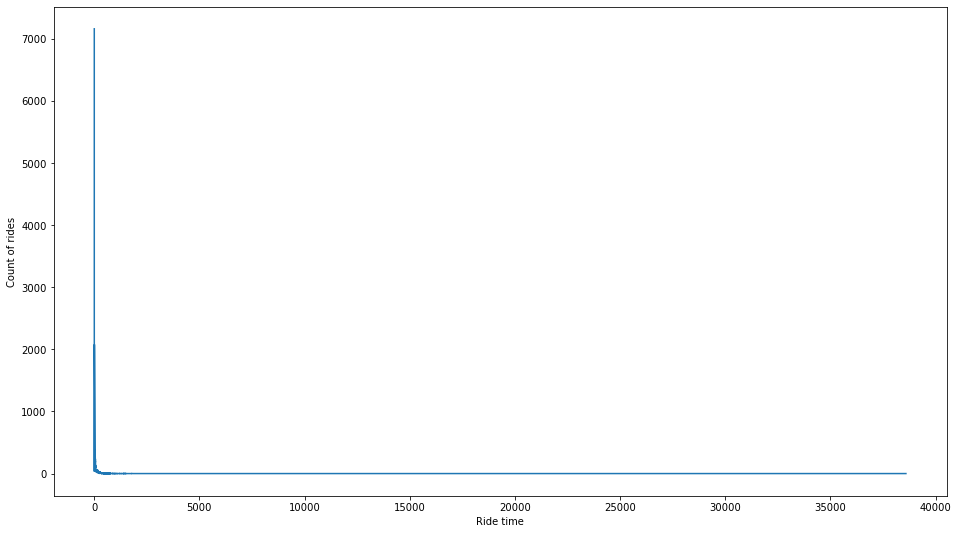

In [23]:
plt.plot(grouped_distances_df.index, grouped_distances_df["count"])
plt.xlabel('Ride time')
plt.ylabel('Count of rides')

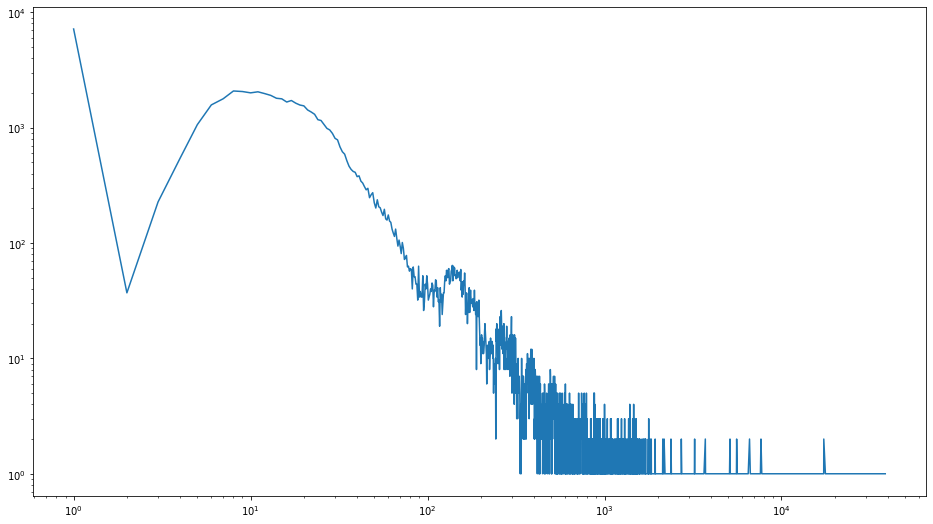

In [24]:
plt.loglog(grouped_distances_df.index, grouped_distances_df["count"])

### Plot with limits

In [25]:
plot_df = grouped_distances_df[grouped_distances_df.index < 1000]

Text(0, 0.5, 'Count of rides')

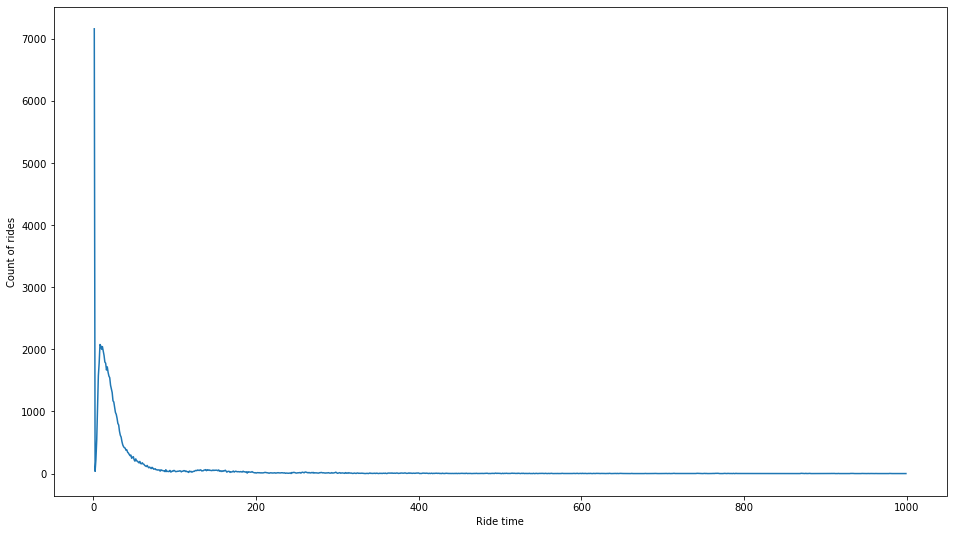

In [26]:
plt.plot(plot_df.index, plot_df["count"])
plt.xlabel('Ride time')
plt.ylabel('Count of rides')

<BarContainer object of 888 artists>

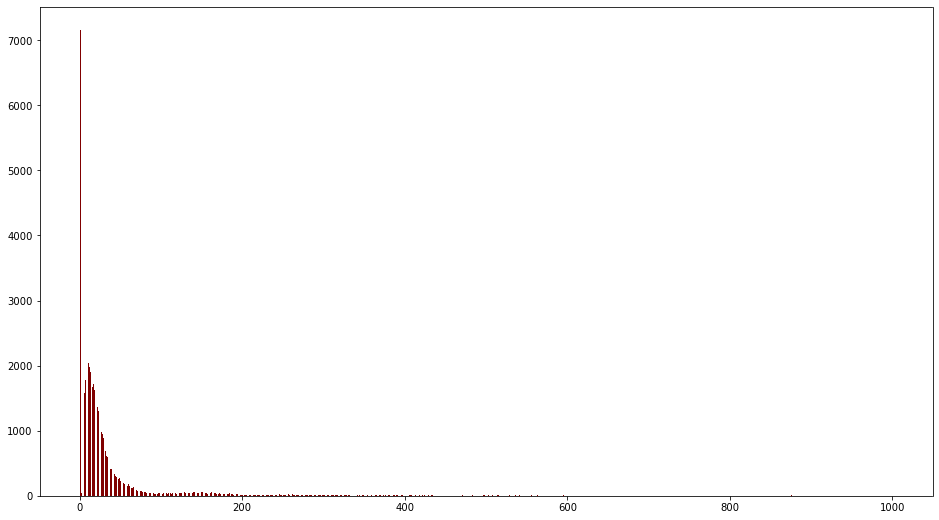

In [27]:
plt.bar(plot_df.index, plot_df["count"], color ='maroon', width = 0.6)

In [28]:
grouped

NameError: name 'grouped' is not defined